# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем все библиотеки и прочитаем файл

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

Проверим, что датасет отображается корректно. Для этого посмотрим первые 5 и последние 5 строк.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Отображается корректно

In [5]:
df.shape

(23699, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим общую гистограмму для всех числовых столбцов таблицы. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

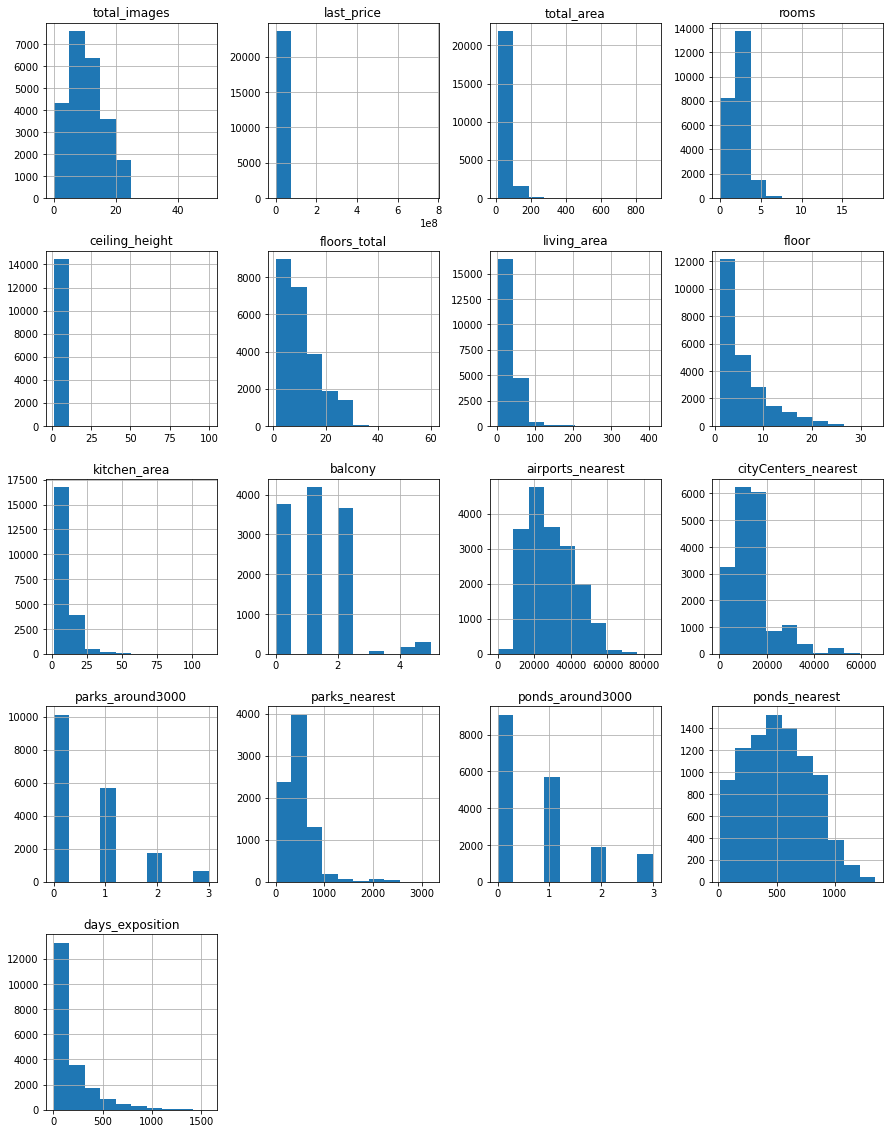

In [7]:
df.hist(figsize=(15, 20))

<b>Вывод</b><br>
<b>1) Большое количество пропусков.</b><br>
<b>2) Есть проблемы с типами данных.</b><br>
<b>3) Всего в датасете 23699 строк и 22 столбца.</b><br>

### Предобработка данных

Проверим количество дубликатов.

In [8]:
df.duplicated().sum()

0

In [9]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В столбце locality_name встречается много неявных дубликатов, некоторые населенные пункты записывают одновременно как поселок, так и посёлок, поселок городского типа, деревня.

In [10]:
def replace_wrong_values(wrong_values, correct_value): 
        for wrong_value in wrong_values:
            df['locality_name'] = df['locality_name'].str.replace(wrong_value, correct_value) 
            
cities = ['посёлок городского типа', 'поселок городского типа', 'городской поселок','городской посёлок','деревня','посёлок','коттеджный поселок'] 
name = 'поселок'
replace_wrong_values(cities, name) 

#заменим некоторые частные случаи
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок при железнодорожной станции')
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино', 'Мурино')
df['locality_name'] = df['locality_name'].str.replace('поселок Кудрово', 'Кудрово')
df['locality_name'] = df['locality_name'].str.replace('поселок Любань', 'Любань')

df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'поселок Агалатово', 'поселок Александровская',
       'поселок Алексеевка', 'поселок Аннино', 'поселок Аро',
       'поселок Барышево', 'поселок Батово', 'поселок Бегуницы',
       'поселок Белогорка', 'поселок Белоостров', 'поселок Большая Вруда',
       'поселок Большая Ижора', 'поселок Большая Пустомержа',
       'поселок Большие Колпаны', 'поселок Большое Рейзино',
       'посело

Написали функцию, которая заменяет все значения на значение поселок с сохранением логического смысла.

In [11]:
df['locality_name'].value_counts()

Санкт-Петербург          15721
Мурино                     590
Кудрово                    472
поселок Шушары             440
Всеволожск                 398
                         ...  
поселок Мыза-Ивановка        1
село Шум                     1
поселок Ропша                1
поселок Шугозеро             1
поселок Гладкое              1
Name: locality_name, Length: 310, dtype: int64

Теперь данные населенные пункты выглядят корректно.

Заполним пропуски там, где это возможно

In [12]:
# Заменим пропуски в столбце balcony нулями.
df['balcony'] = df['balcony'].fillna(0)

# Заменим пропуски высоты потолка медианным значением
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median()) 

In [13]:
living_area_coe = df['living_area'].median() / df['total_area'].median()
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_area_coe)

kitchen_area_coe = df['kitchen_area'].median()/ df['total_area'].median()
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_area_coe)

Изменим типы данных

In [14]:
# Заменим float на int, так как в таблице представлены только целые числа
df['last_price'] = df['last_price'].astype('int64')
df['floors_total'] = df['floors_total'].convert_dtypes() 
df['parks_around3000'] = df['parks_around3000'].convert_dtypes()
df['ponds_around3000'] = df['ponds_around3000'].convert_dtypes() 

# Заменим object на datetime64 для работы с датами
df["first_day_exposition"] = df["first_day_exposition"].astype("datetime64")

# Получение из столбца с датой и временем...
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,18863.0,16028.0,1,482.0,2,755.0,NaN,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,NaN,...,12817.0,18603.0,0,NaN,0,NaN,81.0,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,NaN,...,21741.0,13933.0,1,90.0,2,574.0,558.0,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.730769,9,NaN,...,28098.0,6800.0,2,84.0,3,234.0,424.0,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,31856.0,8098.0,2,112.0,1,48.0,121.0,1,6,2018


<b>Вывод:</b><br>
<b>1. Заполнили пропуски в столбце balcony нулями. Если продавец не указал число балконов, то, скорее всего, в его квартире их нет.</b><br>
<b>2. Заполнили пропуски в столбце ceiling_height медианным значением, тк это не исказит данные</b><br>
<b>3. Заполнить пропуски в остальных столбцах нельзя, так как это сильного исказить дальнейшие расчеты</b><br>
<b>4. Поменяли типы данных в пяти столбцах</b><br>
<b>5. Добавили столбцы с днем, месяцем и годом публикации объявления</b><br>



### Посчитайте и добавьте в таблицу новые столбцы

In [15]:
#Посчитаем цену за кв.метр
df['price_per_m2'] = df['last_price'] / df['total_area']
df['price_per_m2'] = df['price_per_m2'].astype('int32')


# инициализируем новый столбец
df['type_floor'] = 'other' 
# расставляем первые этажы
is_first = df['floor'] == 1
df.loc[is_first, 'type_floor'] = 'first'
# расставляем последние этажи
is_last = df['floor'] == df['floors_total']
df.loc[is_last, 'type_floor'] = 'last'

#Посчитаем расстояние до центра города в км и округлим
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_per_m2,type_floor,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,482.0,2,755.0,NaN,3,3,2019,120370,other,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,NaN,...,NaN,0,NaN,81.0,1,12,2018,82920,first,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,NaN,...,90.0,2,574.0,558.0,3,8,2015,92785,other,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.730769,9,NaN,...,84.0,3,234.0,424.0,4,7,2015,408176,other,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,112.0,1,48.0,121.0,1,6,2018,100000,other,8.0


### Проведите исследовательский анализ данных

In [16]:
df['total_area'].quantile(0.05), df['total_area'].quantile(0.95)

(31.0, 116.0)

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

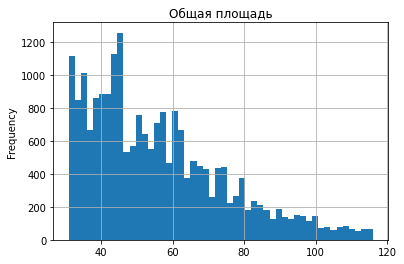

In [17]:
df['total_area'].plot(kind = 'hist', bins = 50, range = (31,116), title = 'Общая площадь', grid=True)

Больше всего квартир с площадью 45 и 35 кв.м. Также есть скачок у квартир с площадью около 60 кв.м.

In [18]:
df['last_price'].quantile(0.05), df['last_price'].quantile(0.95)

(1870000.0, 15300000.0)

<AxesSubplot:title={'center':'Распределение кол-ва квартир по цене'}, ylabel='Frequency'>

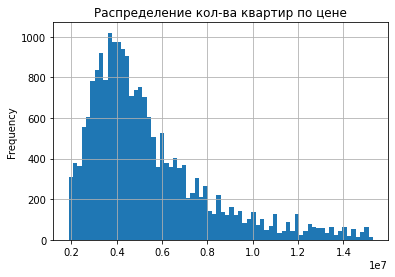

In [19]:
df['last_price'].plot(kind='hist', bins=70, range=(1870000,15300000), title='Распределение кол-ва квартир по цене', grid=True)

Болшинство квартир в районе 4 млн.руб. после 4 млн. руб. наблюдается тендцения на падение кол-ва квартир.

<AxesSubplot:title={'center':'Распределение кол-ва квартир по кол-ву комнат'}, ylabel='Frequency'>

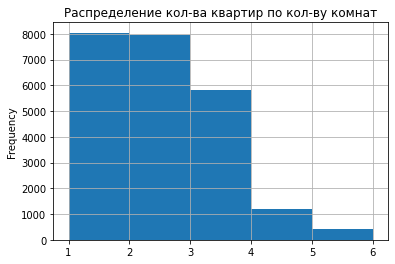

In [20]:
df['rooms'].plot(kind='hist', bins=5, range=(1,6), title='Распределение кол-ва квартир по кол-ву комнат', grid=True)

Самые популярные квартиры - однокомнатные и двухкомнатные. Дальше тенденция на снижение количества комнат.

<AxesSubplot:title={'center':'Распределение кол-ва квартир по высоте потолка'}, ylabel='Frequency'>

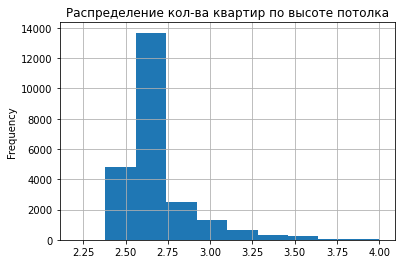

In [21]:
df['ceiling_height'].plot(kind='hist', bins=10, range=(2.2,4.0), title='Распределение кол-ва квартир по высоте потолка', grid=True)

Самое популярное значение - 2.6, вероятно из-за того, что столбец был заполнен медианным значением

array([[<AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>]], dtype=object)

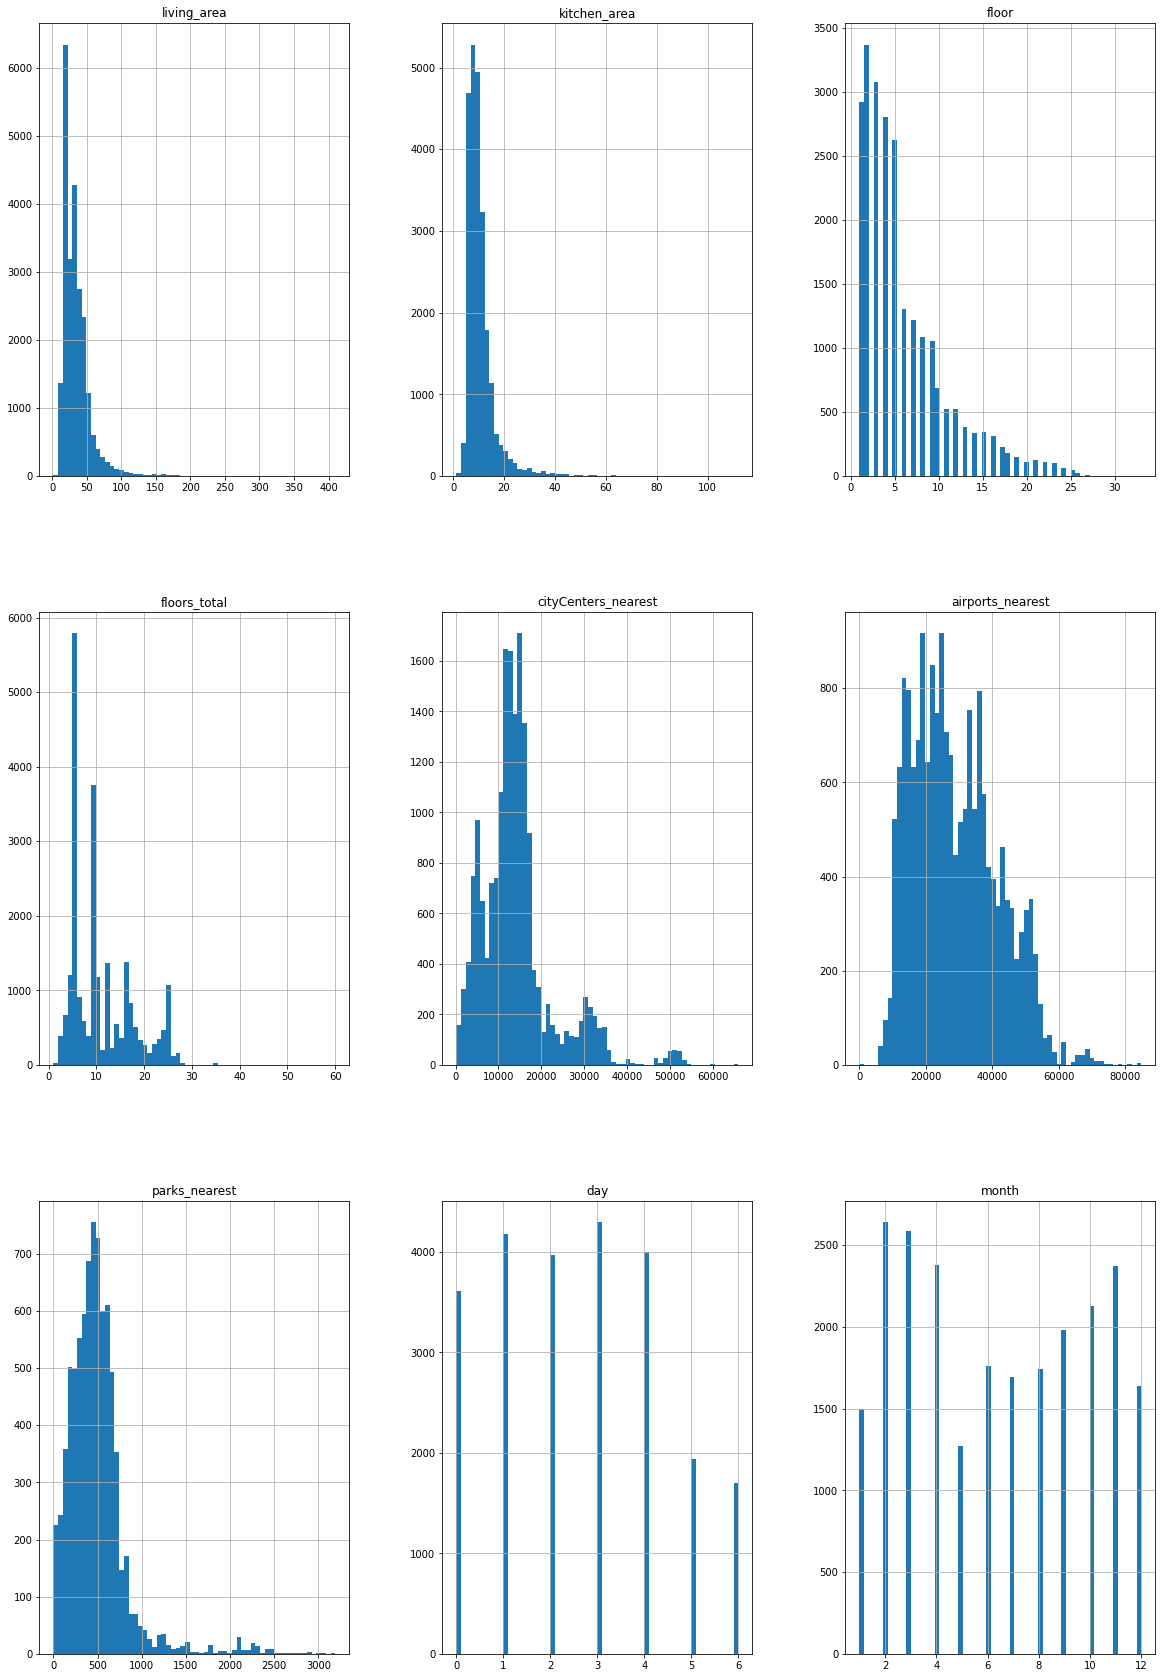

In [22]:
df[[ 'living_area', 'kitchen_area','floor', 
    'type_floor' ,'floors_total', 'cityCenters_nearest', 'airports_nearest', 
    'parks_nearest', 'day', 'month']].hist(figsize = (20, 30), bins = 60)

1)Чаще всего объявления публикуются в будние дни, почти в два раза чаще, чем в выходные. \
2)Чаще всего объявления публикуются в феврале, марте, апреле и ноябре. Реже всего - в мае и летом. \
3)Распределение по близости к аэропорту и паркам имеет нормальное распределение. \
4)Больше всего представлено квартир, расположенных на первом-пятом этажах, по общему числу этажей в доме преобладают шестиэтажки и девятиэтажки (самые распространненые дома)\
5)Жилая площадь и площадь кухни имеют одинаковые графики.

In [23]:
df['days_exposition'].quantile(0.05), df['days_exposition'].quantile(0.95)

(9.0, 647.0)

<AxesSubplot:title={'center':'Распределение по дням размещения обьявления до продажи квартиры'}, ylabel='Frequency'>

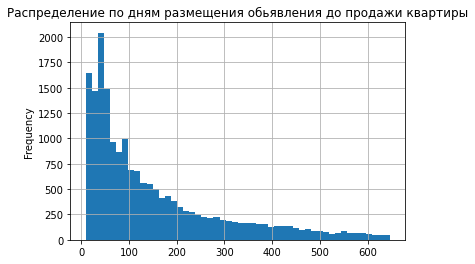

In [24]:
df['days_exposition'].plot(kind = 'hist', bins = 50, range = (9,647), title = 'Распределение по дням размещения обьявления до продажи квартиры', grid=True)

<AxesSubplot:title={'center':'Распределение по дням размещения обьявления до продажи квартиры'}, ylabel='Frequency'>

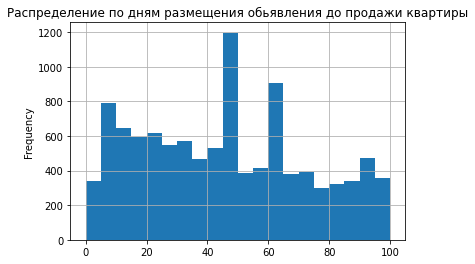

In [25]:
df['days_exposition'].plot(kind = 'hist', bins = 20, range = (0,100), title = 'Распределение по дням размещения обьявления до продажи квартиры', grid=True)

In [26]:
df['days_exposition'].value_counts().head(10)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
3.0     158
5.0     152
14.0    148
9.0     143
Name: days_exposition, dtype: int64

Самыми популярными (пики) днями являются 30, 45 и 60 дней. \
Эти дни являются выбросами, потому что на платформе объявления автоматически снимаются в эти дни. \
Следует эти данные удалить.

In [27]:
df = df.query('days_exposition < 45 or days_exposition > 46')
df = df.query('days_exposition < 30 or days_exposition > 30')
df = df.query('days_exposition != 60')

<AxesSubplot:title={'center':'Распределение по дням размещения обьявления до продажи квартиры'}, ylabel='Frequency'>

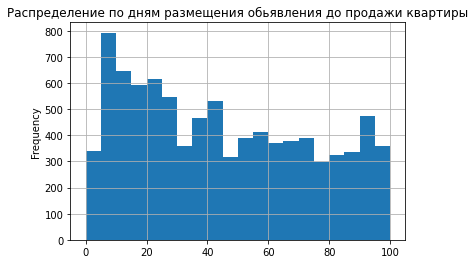

In [28]:
df['days_exposition'].plot(kind = 'hist', bins = 20, range = (0,100), title = 'Распределение по дням размещения обьявления до продажи квартиры', grid=True)

Теперь в графике нет заметных выбросов.

In [29]:
print('Среднее по столбцу: ', df['days_exposition'].mean())
print('Медиана по столбцу: ', df['days_exposition'].median())

Среднее по столбцу:  192.32230573787848
Медиана по столбцу:  110.0


In [30]:
df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'day', 'month', 'year']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,day,month,year
last_price,1.000000,0.644866,0.577070,0.503826,0.357007,0.005566,0.003424,-0.057860
total_area,0.644866,1.000000,0.944979,0.662412,0.760693,-0.001346,0.001382,-0.110839
living_area,0.577070,0.944979,1.000000,0.503588,0.830892,-0.001770,-0.004679,-0.105969
kitchen_area,0.503826,0.662412,0.503588,1.000000,0.325936,-0.002022,-0.001901,-0.073511
rooms,0.357007,0.760693,0.830892,0.325936,1.000000,-0.002730,-0.004724,-0.095818
day,0.005566,-0.001346,-0.001770,-0.002022,-0.002730,1.000000,0.012433,0.004336
month,0.003424,0.001382,-0.004679,-0.001901,-0.004724,0.012433,1.000000,-0.183860
year,-0.057860,-0.110839,-0.105969,-0.073511,-0.095818,0.004336,-0.183860,1.000000


In [31]:
df[['last_price', 'price_per_m2', 'rooms', 'cityCenters_nearest']].corr()

,last_price,price_per_m2,rooms,cityCenters_nearest
last_price,1.000000,0.741096,0.357007,-0.194559
price_per_m2,0.741096,1.000000,0.059837,-0.318322
rooms,0.357007,0.059837,1.000000,-0.188152
cityCenters_nearest,-0.194559,-0.318322,-0.188152,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='price_per_m2', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='price_per_m2'>,
        <AxesSubplot:xlabel='price_per_m2', ylabel='price_per_m2'>,
        <AxesSubplot:xlabel='rooms', ylabel='price_per_m2'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='price_per_m2'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='price_per_m2', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='price_per_m2', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
       

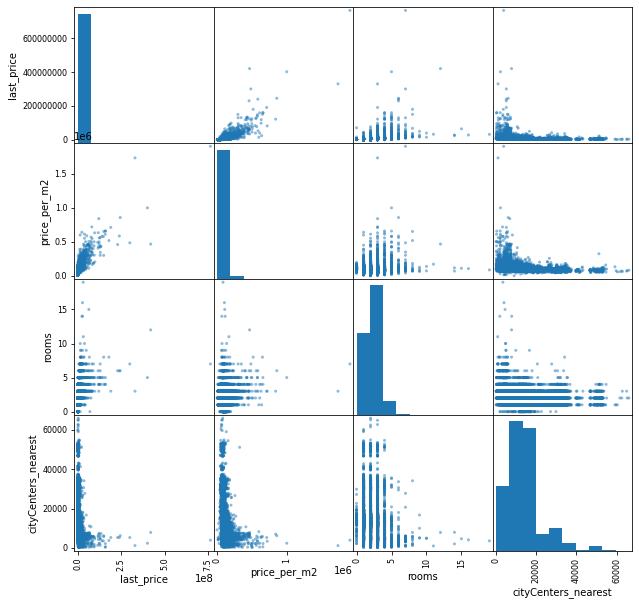

In [32]:
pd.plotting.scatter_matrix(df[['last_price', 'price_per_m2', 'rooms', 'cityCenters_nearest']], figsize=(10,10))

Наблюдается сильная корреляция: чем выше цена квартиры, тем выше цена за 1кв.метр - логично. 
Также наблюдается отрицательная корреляция: чем выше цена квартиры, тем дальше квартира находится от центра города - логично.

In [33]:
def first_floor(floor):
    if floor == 'first':
        return 1
    else:
        return 0
    
def last_floor(floor):
    if floor == 'last':
        return 1
    else:
        return 0
    
def other_floor(floor):
    if floor == 'other':
        return 1
    else:
        return 0
    
df['first_floor'] = df['type_floor'].apply(first_floor)
df['last_floor'] = df['type_floor'].apply(last_floor)
df['other_floor'] = df['type_floor'].apply(other_floor)

In [34]:
df[['last_price', 'first_floor', 'last_floor', 'other_floor']].corr()

,last_price,first_floor,last_floor,other_floor
last_price,1.000000,-0.058925,0.028503,0.021121
first_floor,-0.058925,1.000000,-0.146993,-0.624357
last_floor,0.028503,-0.146993,1.000000,-0.680878
other_floor,0.021121,-0.624357,-0.680878,1.000000


array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='first_floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='other_floor', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='first_floor'>,
        <AxesSubplot:xlabel='first_floor', ylabel='first_floor'>,
        <AxesSubplot:xlabel='last_floor', ylabel='first_floor'>,
        <AxesSubplot:xlabel='other_floor', ylabel='first_floor'>],
       [<AxesSubplot:xlabel='last_price', ylabel='last_floor'>,
        <AxesSubplot:xlabel='first_floor', ylabel='last_floor'>,
        <AxesSubplot:xlabel='last_floor', ylabel='last_floor'>,
        <AxesSubplot:xlabel='other_floor', ylabel='last_floor'>],
       [<AxesSubplot:xlabel='last_price', ylabel='other_floor'>,
        <AxesSubplot:xlabel='first_floor', ylabel='other_floor'>,
        <AxesSubplot:xlabel='last_floor', ylabel='other_floor'>,
        <AxesSubplot:xl

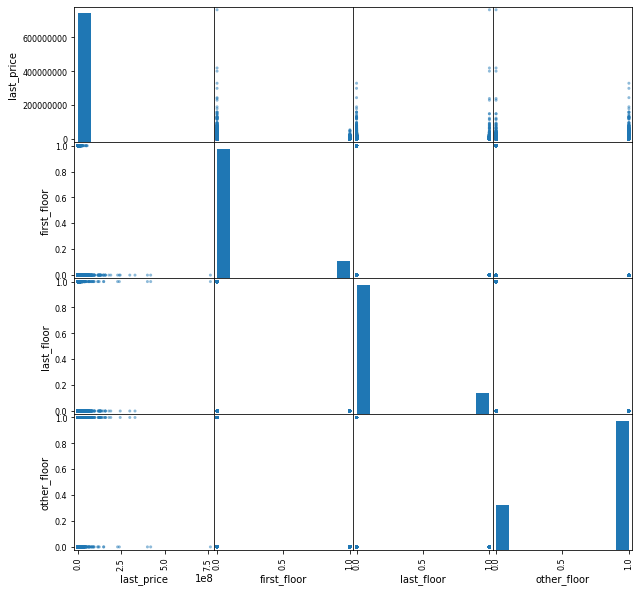

In [35]:
pd.plotting.scatter_matrix(df[['last_price', 'first_floor', 'last_floor', 'other_floor']], figsize=(10,10))

Прослеживается слабая, но зависимость цены квартиры от этажа, на котором она расположена: квартиры, расположенные на первыом этаже, стоят дешевле. Наибольшой рост, если квартира расположена на последнем этаже.

In [36]:
df[['last_price', 'day', 'month', 'year']].corr()

,last_price,day,month,year
last_price,1.000000,0.005566,0.003424,-0.057860
day,0.005566,1.000000,0.012433,0.004336
month,0.003424,0.012433,1.000000,-0.183860
year,-0.057860,0.004336,-0.183860,1.000000


День и месяц размещения объявления никак не влияет на цену квартиры. Прослеживается слабая отрицательная корреляция между годом и ценой квартиры: чем дольше квартира продается, тем цена на нее ниже.

In [37]:
top_locality = df['locality_name'].value_counts().head(10)
top_price = df.pivot_table(index = 'locality_name', values = 'price_per_m2')
top_locality = top_price.merge(top_locality,  how='right', left_index=True, right_index=True)
top_locality.sort_values(by = 'price_per_m2',ascending = False)

,price_per_m2,locality_name
Санкт-Петербург,112885.841618,12754
Пушкин,102460.228374,289
Кудрово,94093.826196,397
поселок Парголово,89809.931298,262
Мурино,85520.607422,512
поселок Шушары,78163.188525,366
Колпино,75128.315217,276
Всеволожск,68558.993528,309
Гатчина,67529.167347,245
Выборг,56934.284916,179


Самым дорогим городом по стоимости за кв.метр является Санкт-Петербург, самым дешевым из топ-10 явялется Выборг.

In [38]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb_hist = spb.groupby('cityCenters_nearest_km')['price_per_m2'].mean().head(10).to_frame()
spb_hist['cityCenters_nearest_km'] = spb_hist.index
spb_hist

,price_per_m2,cityCenters_nearest_km
cityCenters_nearest_km,,
0.0,235287.444444,0.0
1.0,161220.238994,1.0
2.0,152875.120000,2.0
3.0,117233.838462,3.0
4.0,132831.028777,4.0
5.0,140022.979893,5.0
6.0,149644.442191,6.0
7.0,152451.211480,7.0
8.0,124539.877339,8.0


<AxesSubplot:xlabel='cityCenters_nearest_km'>

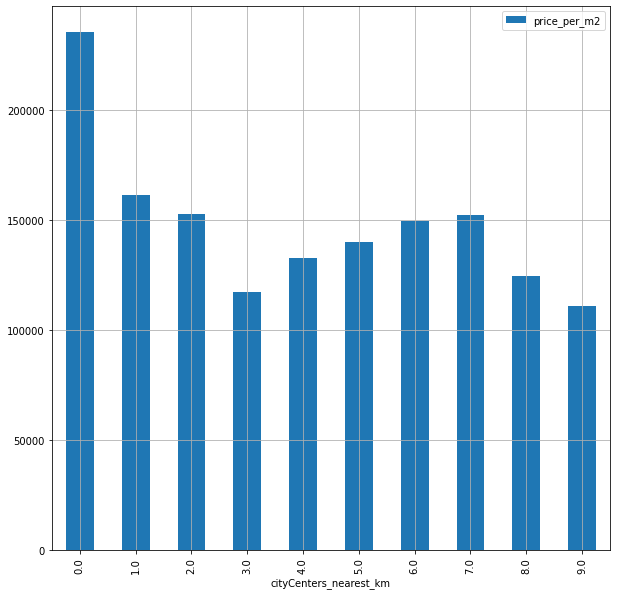

In [39]:
spb_hist.plot(kind = 'bar', x='cityCenters_nearest_km', y='price_per_m2',figsize=(10,10), grid = True)

Прослеживается логическая закономерность в Санкт-Петербурге: чем ближе к центру города - тем дороже стоимость за кв.метр

### Общий вывод

1) Больше всего влияет на цену - близость к центру, после по уменьшению влияния: кол-во комнат и этаж расположения.. 

2) Самый дорогой населенный пунтк в Лен.области - это Санкт-Петербург 

3) Лучше всего квартиры продаются на 45 и 60 день. 

4) В Санкт-Петебурге чем ближе к центру города - тем дороже стоимость за кв.метр и следовательно стоимость квартиры.


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x] в каждом этапе есть промежуточные выводы
- [x] есть общий вывод